In [104]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn

In [131]:
X = torch.linspace(1, 50, 50).reshape(-1, 1)

In [132]:
X

tensor([[ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.],
        [11.],
        [12.],
        [13.],
        [14.],
        [15.],
        [16.],
        [17.],
        [18.],
        [19.],
        [20.],
        [21.],
        [22.],
        [23.],
        [24.],
        [25.],
        [26.],
        [27.],
        [28.],
        [29.],
        [30.],
        [31.],
        [32.],
        [33.],
        [34.],
        [35.],
        [36.],
        [37.],
        [38.],
        [39.],
        [40.],
        [41.],
        [42.],
        [43.],
        [44.],
        [45.],
        [46.],
        [47.],
        [48.],
        [49.],
        [50.]])

In [133]:
torch.manual_seed(71)
e = torch.randint(-8, 9, size=(50, 1), dtype=torch.float)

In [134]:
e

tensor([[ 2.],
        [ 7.],
        [ 2.],
        [ 6.],
        [ 2.],
        [-4.],
        [ 2.],
        [-5.],
        [ 4.],
        [ 1.],
        [ 2.],
        [ 3.],
        [ 1.],
        [-8.],
        [ 5.],
        [ 5.],
        [-6.],
        [ 0.],
        [-7.],
        [-8.],
        [-3.],
        [-1.],
        [ 2.],
        [-6.],
        [-3.],
        [ 3.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 1.],
        [ 7.],
        [ 6.],
        [-1.],
        [-6.],
        [-5.],
        [-3.],
        [ 7.],
        [ 0.],
        [ 8.],
        [-1.],
        [-2.],
        [ 2.],
        [-8.],
        [-1.],
        [ 6.],
        [-8.],
        [-3.],
        [-7.],
        [-2.]])

In [135]:
y = 2 * X + 1 + e

In [136]:
y.shape

torch.Size([50, 1])

In [137]:
X.numpy() # reports as numpy array for plotting purposes

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [11.],
       [12.],
       [13.],
       [14.],
       [15.],
       [16.],
       [17.],
       [18.],
       [19.],
       [20.],
       [21.],
       [22.],
       [23.],
       [24.],
       [25.],
       [26.],
       [27.],
       [28.],
       [29.],
       [30.],
       [31.],
       [32.],
       [33.],
       [34.],
       [35.],
       [36.],
       [37.],
       [38.],
       [39.],
       [40.],
       [41.],
       [42.],
       [43.],
       [44.],
       [45.],
       [46.],
       [47.],
       [48.],
       [49.],
       [50.]], dtype=float32)

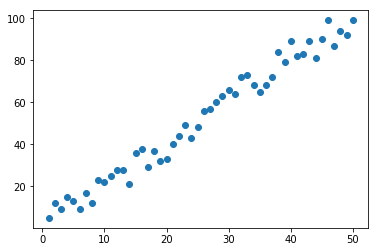

In [112]:
plt.scatter(X.numpy(), y.numpy())

In [113]:
torch.manual_seed(59)

model = nn.Linear(in_features=1, out_features=1)

print(model.weight)
print(model.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [114]:
class Model(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)
        
    def forward(self, X):
        y_pred = self.linear(x)
        return y_pred

In [115]:
torch.manual_seed(59)

model = Model(1,1)
print(model.linear.weight)
print(model.linear.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [116]:
for name, param in model.named_parameters():
    print(name, '\t', param.item())

linear.weight 	 0.10597813129425049
linear.bias 	 0.9637961387634277


In [117]:
x = torch.tensor([2.0])
print(model.forward(x))

tensor([1.1758], grad_fn=<AddBackward0>)


In [118]:
x1 = np.linspace(0.0, 50.0, 50)
x1

array([ 0.        ,  1.02040816,  2.04081633,  3.06122449,  4.08163265,
        5.10204082,  6.12244898,  7.14285714,  8.16326531,  9.18367347,
       10.20408163, 11.2244898 , 12.24489796, 13.26530612, 14.28571429,
       15.30612245, 16.32653061, 17.34693878, 18.36734694, 19.3877551 ,
       20.40816327, 21.42857143, 22.44897959, 23.46938776, 24.48979592,
       25.51020408, 26.53061224, 27.55102041, 28.57142857, 29.59183673,
       30.6122449 , 31.63265306, 32.65306122, 33.67346939, 34.69387755,
       35.71428571, 36.73469388, 37.75510204, 38.7755102 , 39.79591837,
       40.81632653, 41.83673469, 42.85714286, 43.87755102, 44.89795918,
       45.91836735, 46.93877551, 47.95918367, 48.97959184, 50.        ])

In [119]:
w1 = 0.1059
b1 = 0.9637

y1 = w1 * x1 + b1

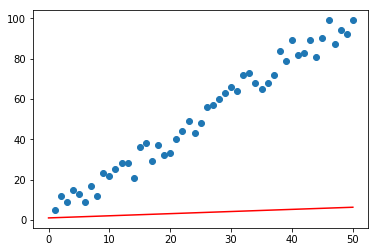

In [120]:
plt.scatter(X.numpy(), y.numpy())
plt.plot(x1, y1, 'r')

In [121]:
criterion = nn.MSELoss()

In [122]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [123]:
X

tensor([[ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.],
        [11.],
        [12.],
        [13.],
        [14.],
        [15.],
        [16.],
        [17.],
        [18.],
        [19.],
        [20.],
        [21.],
        [22.],
        [23.],
        [24.],
        [25.],
        [26.],
        [27.],
        [28.],
        [29.],
        [30.],
        [31.],
        [32.],
        [33.],
        [34.],
        [35.],
        [36.],
        [37.],
        [38.],
        [39.],
        [40.],
        [41.],
        [42.],
        [43.],
        [44.],
        [45.],
        [46.],
        [47.],
        [48.],
        [49.],
        [50.]])

In [124]:
epochs = 50
losses = []

for i in range(epochs):
    i = i + 1
    
    # Predicting on the forward pass
    y_pred = model.forward(X)
    
    # calculate our loss (error)
    loss = criterion(y_pred, y)
    
    # reord that error
    losses.append(loss)
    print(f'epoch {i} loss: {loss.item()} weight: {model.linear.weight.item()} bias: {model.linear.bias.item()}')
    
    optimizer.zero_grad()
    
    loss.backward()
    optimizer.step()

epoch 1 loss: 3387.46435546875 weight: 0.10597813129425049 bias: 0.9637961387634277
epoch 2 loss: 2896.67431640625 weight: 2.138948440551758 bias: 1.9802812337875366
epoch 3 loss: 2499.134521484375 weight: 3.968621253967285 bias: 2.8951175212860107
epoch 4 loss: 2177.127197265625 weight: 5.615326881408691 bias: 3.7184700965881348
epoch 5 loss: 1916.301513671875 weight: 7.0973615646362305 bias: 4.459487438201904
epoch 6 loss: 1705.0325927734375 weight: 8.431193351745605 bias: 5.126403331756592
epoch 7 loss: 1533.9049072265625 weight: 9.631641387939453 bias: 5.726627349853516
epoch 8 loss: 1395.29150390625 weight: 10.712044715881348 bias: 6.266829013824463
epoch 9 loss: 1283.0145263671875 weight: 11.684408187866211 bias: 6.7530107498168945
epoch 10 loss: 1192.0701904296875 weight: 12.559535026550293 bias: 7.1905741691589355
epoch 11 loss: 1118.4052734375 weight: 13.347148895263672 bias: 7.584381103515625
epoch 12 loss: 1058.736572265625 weight: 14.056001663208008 bias: 7.938807487487793


Text(0.5, 0, 'Epoch')

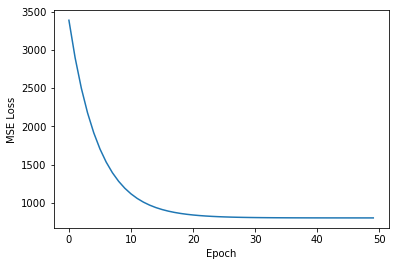

In [125]:
plt.plot(range(epochs), losses)
plt.ylabel('MSE Loss')
plt.xlabel('Epoch')

In [126]:
x = np.linspace(0.0, 50.0, 50)
current_weight = model.linear.weight.item()
current_bias = model.linear.bias.item()

predicted_y = current_weight * x + current_bias

In [127]:
predicted_y

array([  11.07625866,   31.82207713,   52.5678956 ,   73.31371407,
         94.05953254,  114.805351  ,  135.55116947,  156.29698794,
        177.04280641,  197.78862488,  218.53444335,  239.28026182,
        260.02608029,  280.77189876,  301.51771723,  322.26353569,
        343.00935416,  363.75517263,  384.5009911 ,  405.24680957,
        425.99262804,  446.73844651,  467.48426498,  488.23008345,
        508.97590192,  529.72172038,  550.46753885,  571.21335732,
        591.95917579,  612.70499426,  633.45081273,  654.1966312 ,
        674.94244967,  695.68826814,  716.4340866 ,  737.17990507,
        757.92572354,  778.67154201,  799.41736048,  820.16317895,
        840.90899742,  861.65481589,  882.40063436,  903.14645283,
        923.89227129,  944.63808976,  965.38390823,  986.1297267 ,
       1006.87554517, 1027.62136364])

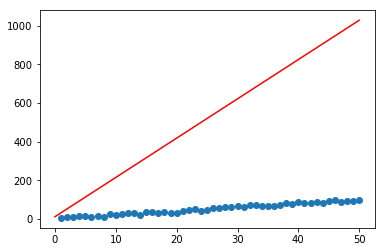

In [128]:
plt.scatter(X.numpy(), y.numpy())
plt.plot(x, predicted_y, 'r')